# PPMS Rotator
updated 4/22/23 by Justin
### This is general code for running magnetoresistance measurements with the rotator in the PPMS
-  Use Keithley 2182s for voltage measurements and 2400s for current sourcing.

# WARNING: as of 6/1/23, do not switch the negative side of the 2400 for voltage measurements. Use a common ground pin and only switch the positive.

#### First, define connections:
-  The pucks have 8 pins, labelled on the puck from 7 to 14. 
-  Initialize a BreakoutBoxConnections object and add connections by calling its functions.


#### then define measurement parameters:
-  Optionally name each measurement and assoicate it with connections on the matrix switch

#### Example usage
```python
from UtilsMeasurementSetup import *
from UtilsBasic import *
import time

C=BreakoutBoxConnections()
C.addMatrixSwitch()
C.addPPMS()
C.addRotPuckConnection(7,'BareCenter', SwitchLabel='a') # connect this to switch port a
C.addRotPuckConnection(8,'OuterRings') # directly connect this to 2400/2182 -
C.addRotPuckConnection(9,'PtCenter', SwitchLabel='c') # connect this to switch port c
C.addInstrument(2400,25,SwitchLabels={'I+':'p'}) # connect + to switch port p
VM=C.addInstrument(2182,5,SwitchLabels={'V1+':'p'}) # I would just connect 2182 +/- directly to 2400 +/- 
#PL=C.addInstrument(6221,14,SwitchLabels={'P+':'m','P-':'o'}, Dummy=True)

#print(C.getSettingsString())
Angles=CreateArrayWithSteps([0,360,0],[5,-5])

MS=MeasurementSettings(C)

MS.setVoltageMeasurementOptions(NumberofVPoints=30,WaitAfterOn=1, BiPolar=True)
MS.setCurrentSourceOptions(SourceComplianceVoltage=200,SourceCurrentRange=10e-3)

DC_Current=2e-5

MS.addMeasurementConnection('PtCorbino',CurrentAmplitude=DC_Current,SwitchConnections=['PtCenter,I+'])
MS.addMeasurementConnection('BareCorbino',CurrentAmplitude=DC_Current,SwitchConnections=['BareCenter,I+'])

MS.FileSettings(MeasurementID='RT_Longitudinal_Test', SampleID='LMB713_Pt_MnTe_InP')

note='Temperature series of Corbino disk angular MR both with Pt and without.'
Temps=[300,250,200,150,100,80,50,20,5]
Fields=[1,5,7,14]
for T in Temps:
    for F in Fields:
        MS.setMeasurementParams(Angle=Angles,MagneticField=F,Temperature=T)
        
        MS.FileSettings(MeasurementID='{}K_{:.1e}A_{:.1f}T'.format(T,DC_Current,F/10000),
                        SampleID='LMB713_Pt_MnTe_InP',MeasurementNote=note)
        MS.autoRunMeasurement()

```

In [1]:
from UtilsMeasurementSetup import *
from UtilsBasic import *
import time

C=BreakoutBoxConnections()
S=C.addMatrixSwitch()
C.addPPMS()
C.addRotPuckConnection(7,'10W20L+', SwitchLabel='a')
C.addRotPuckConnection(8,'10W20L-') #2182 - here
C.addRotPuckConnection(9,'10W10L+', SwitchLabel='b') 
C.addRotPuckConnection(10,'10W10L-')#2182 - here
C.addRotPuckConnection(11,'10W5L+', SwitchLabel='c')
C.addRotPuckConnection(12,'10W5L-')#2182 - here
PL=C.addInstrument(6221,14,SwitchLabels={'V+':'k'})
#VS=C.addInstrument(2400,15, DeviceName='VoltageSupply')
print(C.getSettingsString)


Visa Rescource List:
Telnet connection to LinkBone has been established!
Matrix Switch State:

Mode: multi
     I   J   K   L   M   N   O   P  
A - Off Off Off Off Off Off Off Off 
B - Off Off Off Off Off Off Off Off 
C - Off Off Off Off Off Off Off Off 
D - Off Off Off Off Off Off Off Off 
E - Off Off Off Off Off Off Off Off 
F - Off Off Off Off Off Off Off Off 
G - Off Off Off Off Off Off Off Off 
H - Off Off Off Off Off Off Off Off 

PPMS connection established!
Current Rotator Position: -0.0003647804260253906
Current PPMS Temperature: 299.8226318359375
Current PPMS Field: 1000.570068359375
Added Keithley 6221 with name Pulser and GPIB number 14
<bound method BreakoutBoxConnections.getSettingsString of list of connected instruments:
PPMS IP: 192.168.0.7
Switch IP: 192.168.0.8

	 Device Name:Pulser
	 Device Type:6221
	 Device GPIB Number:14
	 Connection Name     , Connection Switch Label
	 V+                  , k                   

list of rotator puck connections:
	 Connection Name

In [4]:
#print(C.getSettingsString())
for T in [300]:
    for Pulse_Current in [15e-3,20e-3]:
        for F in [1000,500]:
            Angles=CreateArrayWithSteps([0,360,0],[10,-10])
            PD_Current=1e-3
            MS=MeasurementSettings(C)

            MS.setVoltageMeasurementOptions(PulseDelta=True, PDCount=50, PDInterval=10, PDWidth=5e-3, PDSourceDelay=1e-3)


            MS.addMeasurementConnection('10W20L',CurrentAmplitude=PD_Current,SwitchConnections=['V+,10W20L+'], VoltRange='1')
            MS.addMeasurementConnection('10W10L',CurrentAmplitude=PD_Current,SwitchConnections=['V+,10W10L+'], VoltRange='1')
            MS.addMeasurementConnection('10W5L',CurrentAmplitude=PD_Current,SwitchConnections=['V+,10W5L+'], VoltRange='1')

            MS.addPulseConnection('10W20L',PulseAmplitude=Pulse_Current,SwitchConnections=['V+,10W20L+'])
            MS.addPulseConnection('10W10L',PulseAmplitude=Pulse_Current,SwitchConnections=['V+,10W10L+'])
            MS.addPulseConnection('10W5L',PulseAmplitude=Pulse_Current,SwitchConnections=['V+,10W5L+'])
            F=1000
            # F=10000

            note='''Try switching between positive and negative pulses with an applied field.
            Check for hysteresis with 2nm Pt sample.'''

            MS.setMeasurementParams(Angle=Angles,MagneticField=F,Temperature=T,InitialWaitTime=0)

            if isinstance(F,list):
                field_string=F[0]/10000
                admr_type='rem'
            else:
                field_string=F/10000
                admr_type='sat'
            
            admr_type='{:.2f}mA_pos_neg_pulse_FieldON'.format(Pulse_Current*1e3)
            MS.FileSettings(MeasurementID='XE522-2_{:.1f}T_{:.1f}K_{}'.format(field_string,T,admr_type), SampleID='XE522-2_SW_Pt(1p8)_Fe2O3(30)_Al2O3(0001)G3')
            # PulseAmplitudes=CreateArrayWithSteps([0,50e-3],[1e-3])
            # MS.PulseAmplitudeSeriesTest(PulseAmplitudes,'5W10L',10000,105)
            # MS.autoRunMeasurement()
            MS.RunRvsAngleMeasurementPulseField()
            #MS.ConnectandPulse('ParPulse')
            # time.sleep(10)
# print(MS.ConnectanddoVoltageMeasurement('10W20L', Verbose=True))
# print(MS.ConnectanddoVoltageMeasurement('10W10L', Verbose=True))
# print(MS.ConnectanddoVoltageMeasurement('10W5L', Verbose=True))
    # PulseAmplitudes=CreateArrayWithSteps([0,52e-3],[2e-3])
    # MS.PulseAmplitudeSeriesTest(PulseAmplitudes,'10W5L',10000,45,Verbose=False)

The final array generated is  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
The final array generated is  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
The final array generated is  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 350, 340, 330, 320, 310, 300, 290, 280, 270, 26

In [ ]:

#print(C.getSettingsString())
for T in [150,300]:
    Angles=CreateArrayWithSteps([0,360,0],[5,-5])
    PD_Current=1e-3
    MS=MeasurementSettings(C)

    MS.setVoltageMeasurementOptions(PulseDelta=True, PDCount=50, PDInterval=10, PDWidth=5e-3, PDSourceDelay=1e-3)


    MS.addMeasurementConnection('Rxx',CurrentAmplitude=PD_Current,SwitchConnections=['V+,R+'], VoltRange='1')
    MS.addMeasurementConnection('Rxy',CurrentAmplitude=PD_Current,SwitchConnections=['V+,L-'], VoltRange='0.01')

    F=15000

    note='''Resistance is 850Ohm for Rxx. 
    Check Pt thickness series to see how amplitude changes.
    Pattern is a 15um x90um Hall bar, with current flowing from pad 7 to 8 on the puck. (90 degree
    offset)'''
    MS.setMeasurementParams(Angle=Angles,MagneticField=F,Temperature=T,InitialWaitTime=0)

    MS.FileSettings(MeasurementID='XE522-3_HB90_{:.1f}T_{:.1f}K'.format(F/1000,T), SampleID='XE522-3_Pt(2p5)_Fe2O3(30)_Al2O3(0001)G3')
    # PulseAmplitudes=CreateArrayWithSteps([0,50e-3],[1e-3])
    # MS.PulseAmplitudeSeriesTest(PulseAmplitudes,'5W10L',10000,105)
    MS.autoRunMeasurement()
    #MS.ConnectandPulse('ParPulse')
    # time.sleep(10)
# MS.ConnectanddoVoltageMeasurement('Rxx', Verbose=True)
# MS.ConnectanddoVoltageMeasurement('Rxy', Verbose=True)




The final array generated is  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 355, 350, 345, 340, 335, 330, 325, 320, 315, 310, 305, 300, 295, 290, 285, 280, 275, 270, 265, 260, 255, 250, 245, 240, 235, 230, 225, 220, 215, 210, 205, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]
The final array generated is  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275,

(0.001, 0.001528632, 1.274889e-06)

In [10]:

#print(C.getSettingsString())
for T in [300]:
    Angles=CreateArrayWithSteps([0,360,0],[5,-5])
    PD_Current=1e-3
    MS=MeasurementSettings(C)

    MS.setVoltageMeasurementOptions(PulseDelta=True, PDCount=50, PDInterval=10, PDWidth=5e-3, PDSourceDelay=1e-3)


    MS.addMeasurementConnection('Rxx',CurrentAmplitude=PD_Current,SwitchConnections=['V+,R+'], VoltRange='10')
    MS.addMeasurementConnection('Rxy',CurrentAmplitude=PD_Current,SwitchConnections=['V+,L-'], VoltRange='0.01')


    F=[6000,0]

    note='''Check remnance at RT for this sample.
    Resistance is 1.5KOhm for Rxx. Still seems high. Run RT saturated and low T below spin flop overnight.
    Check Pt thickness series to see how amplitude changes.
    Pattern is a 15um x90um Hall bar, with current flowing from pad 7 to 8 on the puck. (90 degree
    offset)'''
    MS.setMeasurementParams(Angle=Angles,MagneticField=F,Temperature=T,InitialWaitTime=0)

    MS.FileSettings(MeasurementID='XE522-2_HB90_{:.1f}T_{:.1f}K_rem'.format(F[0]/1000,T), SampleID='XE522-2_Pt(1p8)_Fe2O3(30)_Al2O3(0001)G3')
    # PulseAmplitudes=CreateArrayWithSteps([0,50e-3],[1e-3])
    # MS.PulseAmplitudeSeriesTest(PulseAmplitudes,'5W10L',10000,105)
    MS.autoRunMeasurement()
    #MS.ConnectandPulse('ParPulse')
    # time.sleep(10)
    # MS.ConnectanddoVoltageMeasurement('Rxx', Verbose=True)
    # MS.ConnectanddoVoltageMeasurement('Rxy', Verbose=True)




The final array generated is  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 355, 350, 345, 340, 335, 330, 325, 320, 315, 310, 305, 300, 295, 290, 285, 280, 275, 270, 265, 260, 255, 250, 245, 240, 235, 230, 225, 220, 215, 210, 205, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]


NameError: Could not find any intances of R+ in BreakoutBoxConnections!

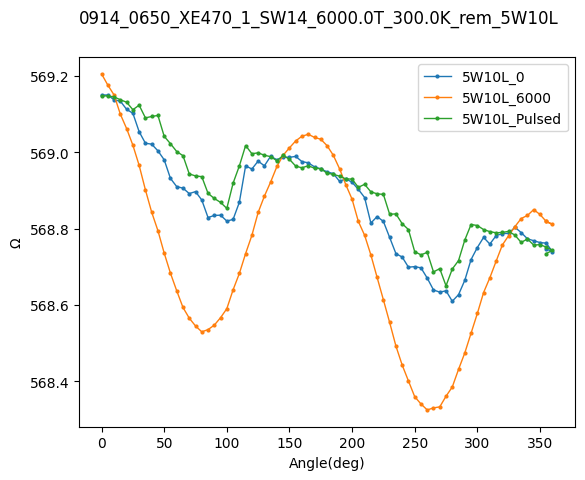

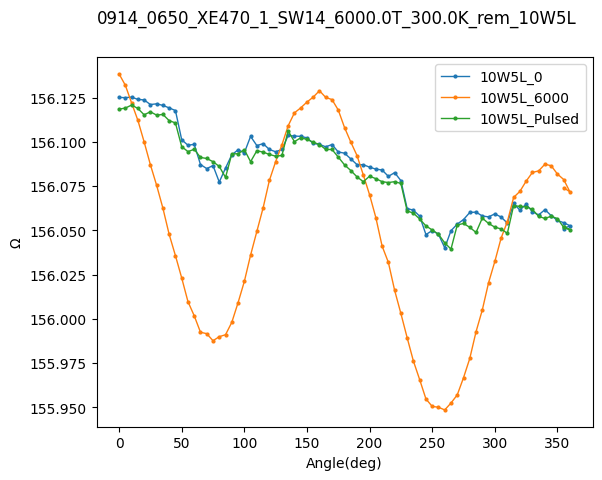


Done.



In [7]:
#print(C.getSettingsString())
for T in [300]:
    Angles=CreateArrayWithSteps([0,360,0],[5,-5])
    PD_Current=1e-3
    MS=MeasurementSettings(C)

    MS.setVoltageMeasurementOptions(PulseDelta=True, PDCount=50, PDInterval=10, PDWidth=5e-3, PDSourceDelay=1e-3)


    MS.addMeasurementConnection('5W10L',CurrentAmplitude=PD_Current,SwitchConnections=['V+,5W10L+'], VoltRange='1')
    MS.addMeasurementConnection('10W5L',CurrentAmplitude=PD_Current,SwitchConnections=['V+,10W5L+'], VoltRange='1')

    MS.addPulseConnection('5W10L',PulseAmplitude=10e-3,SwitchConnections=['V+,5W10L+'])
    MS.addPulseConnection('10W5L',PulseAmplitude=20e-3,SwitchConnections=['V+,10W5L+'])
    F=[6000,0]
    # F=10000

    note='''Test switching for different aspect ratios on 30nm film.
    Pattern is a 5um x 10um swithcing channel and a 10um x 5 um one.
    Current flows from pad 7 to 8 on the puck. (90 degree offset)
    First try saturated measurement to get noise level.
    Pattern resistances are about 600 ohms and 150 ohms.
    Next do current array to get threshold current.
    See a potential switch in 5W10L at ~10 mA.
    A bit noisy so try higher sensing current with lower pulse amplitudes'''

    MS.setMeasurementParams(Angle=Angles,MagneticField=F,Temperature=T,InitialWaitTime=0)

    if isinstance(F,list):
        field_string=F[0]
        admr_type='rem'
    else:
        field_string=F
        admr_type='sat'
    MS.FileSettings(MeasurementID='XE470_1_SW14_{:.1f}T_{:.1f}K_{}'.format(field_string,T,admr_type), SampleID='XE470_1_SW14_Pt(30)_Pt(1p7)_Fe2O3(30)_Al2O3(0001)WafF2')
    # PulseAmplitudes=CreateArrayWithSteps([0,50e-3],[1e-3])
    # MS.PulseAmplitudeSeriesTest(PulseAmplitudes,'5W10L',10000,105)
    # MS.autoRunMeasurement()
    #MS.ConnectandPulse('ParPulse')
    # time.sleep(10)
    # print(MS.ConnectanddoVoltageMeasurement('5W10L', Verbose=True))
    # print(MS.ConnectanddoVoltageMeasurement('10W5L', Verbose=True))
    # PulseAmplitudes=CreateArrayWithSteps([0,52e-3],[2e-3])
    # MS.PulseAmplitudeSeriesTest(PulseAmplitudes,'10W5L',10000,45,Verbose=False)
    MS.RunRvsAngleMeasurementPulse()

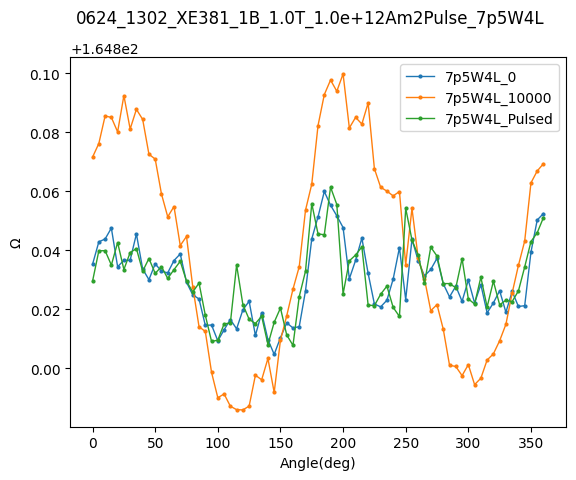

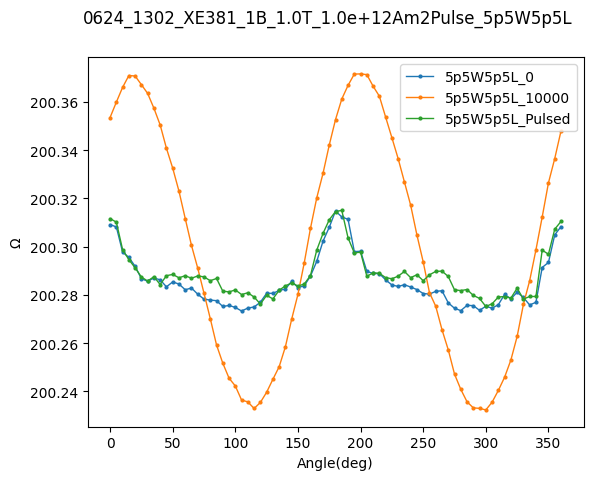

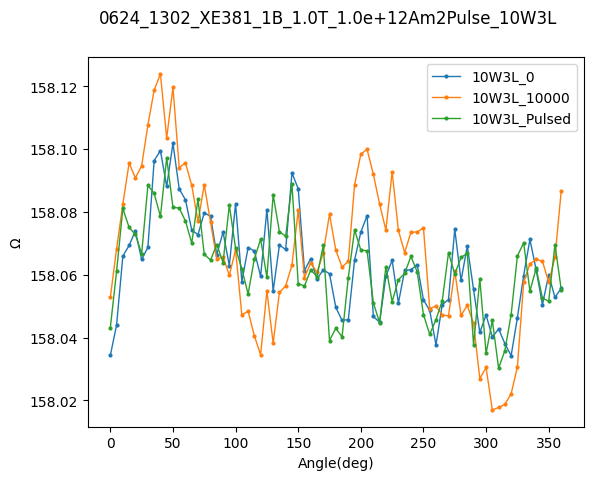

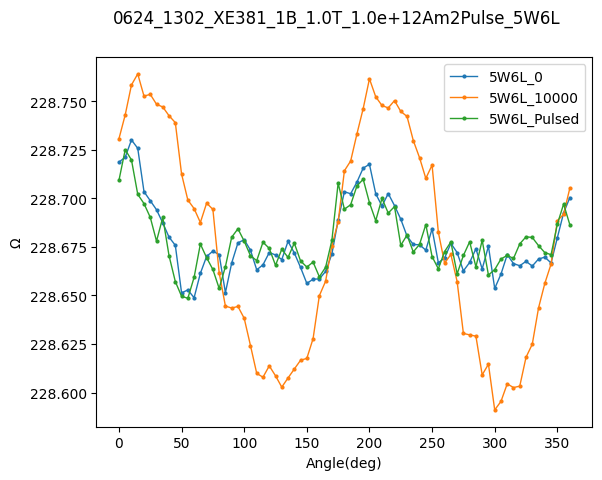

In [ ]:
#print(C.getSettingsString())
Angles=CreateArrayWithSteps([0,360],[5])

Pulse_Current_Densities=[10e11]
for Pulse_Current_Density in Pulse_Current_Densities:
    MS=MeasurementSettings(C)

    MS.setVoltageMeasurementOptions(PulseDelta=True, PDCount=50, PDInterval=5, PDWidth=500e-6, PDSourceDelay=100e-6,)
    MS.setPulseOptions(WaitAfterPulse=30)
    DC_Current=5e-4 # Current Density in A/m^2

    MS.addMeasurementConnection('7p5W4L',CurrentAmplitude=DC_Current,SwitchConnections=['I+,7p5W4L+'])
    MS.addMeasurementConnection('5p5W5p5L',CurrentAmplitude=DC_Current,SwitchConnections=['I+,5p5W5p5L+'])
    MS.addMeasurementConnection('10W3L',CurrentAmplitude=DC_Current,SwitchConnections=['I+,10W3L+'])
    MS.addMeasurementConnection('5W6L',CurrentAmplitude=DC_Current,SwitchConnections=['I+,5W6L+'])


    MS.addPulseConnection('7p5W4L',PulseAmplitude=Pulse_Current_Density*CSA_7p5W4L,SwitchConnections=['P+,7p5W4L+'])
    MS.addPulseConnection('5p5W5p5L',PulseAmplitude=Pulse_Current_Density*CSA_5p5W5p5L,SwitchConnections=['P+,5p5W5p5L+'])
    MS.addPulseConnection('10W3L',PulseAmplitude=Pulse_Current_Density*CSA_10W3L,SwitchConnections=['P+,10W3L+'])
    MS.addPulseConnection('5W6L',PulseAmplitude=Pulse_Current_Density*CSA_5W6L,SwitchConnections=['P+,5W6L+'])

    F=[10000,0]
    MS.FileSettings(MeasurementID='XE381_1B_{:.1f}T_{:.1e}Am2Pulse'.format(F[0]/10000,Pulse_Current_Density), SampleID='XE381_1B_Pt(30)_Pt(3)_Fe2O3(18)_Al2O3(0001)')

    note='''Try changing order. also wait 60s after pulse.
    Try increasing sense current and wait time after switch.
    Change to other pattern. Saw switching but was noisy.'''
    MS.setMeasurementParams(Angle=Angles,MagneticField=F,Temperature=300,WaitAfterSwitch=.3)

    MS.RunRvsAngleMeasurementPulse()


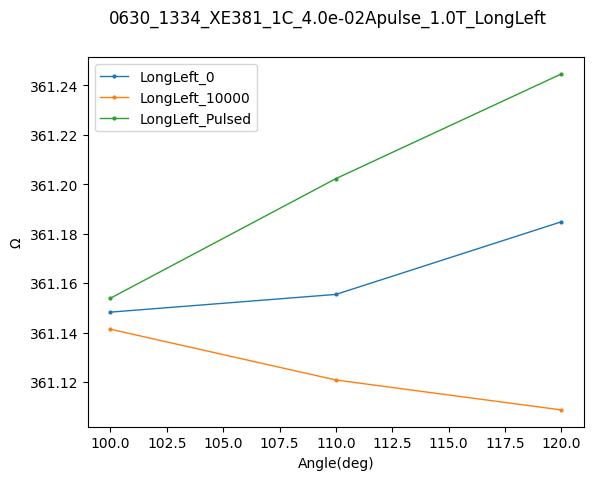

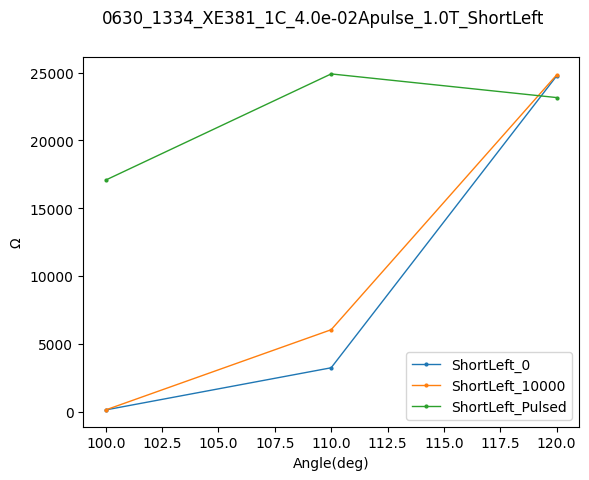

In [5]:
#print(C.getSettingsString())

Fields=[10000,0]
Angles=CreateArrayWithSteps([100,250,100],[10,-10])
for Pulse_Amp in [35e-3,40e-3,45e-3]:
    MS=MeasurementSettings(C)

    MS.setVoltageMeasurementOptions(NumberofVPoints=30,WaitAfterOn=1, BiPolar=True)
    DC_Current=2e-4

    # MS.addMeasurementConnection('LongRight',CurrentAmplitude=DC_Current,SwitchConnections=['I+,LongRight+'])
    MS.addMeasurementConnection('LongLeft',CurrentAmplitude=DC_Current,SwitchConnections=['I+,LongLeft+'])
    # MS.addMeasurementConnection('SquareRight',CurrentAmplitude=DC_Current,SwitchConnections=['I+,SquareRight+'])
    # MS.addMeasurementConnection('SquareLeft',CurrentAmplitude=DC_Current,SwitchConnections=['I+,SquareLeft+'])
    # MS.addMeasurementConnection('ShortRight',CurrentAmplitude=DC_Current,SwitchConnections=['I+,ShortRight+'])
    MS.addMeasurementConnection('ShortLeft',CurrentAmplitude=DC_Current,SwitchConnections=['I+,ShortLeft+'])

    MS.addPulseConnection('LongLeft',PulseAmplitude=Pulse_Amp,SwitchConnections=['P+,LongLeft+'])
    MS.addPulseConnection('ShortLeft',PulseAmplitude=Pulse_Amp,SwitchConnections=['P+,ShortLeft+'])

    MS.setMeasurementParams(Angle=Angles,MagneticField=Fields,Temperature=300)

    MS.FileSettings(MeasurementID='XE381_1C_{:.1e}Apulse_{:.1f}T'.format(Pulse_Amp,Fields[0]/10000), SampleID='XE381_1C_Pt(30)_Pt(3)_Fe2O3(18)_Al2O3(0001)')

    note='''Test PUlse
    Test remnant state
    Test last pattern with saturated field'''

    MS.RunRvsAngleMeasurementPulse()


In [4]:

MS.VoltageOff(VS,Verbose=True)

Stopping output from VoltageSupply


from UtilsMeasurementSetup import *
from UtilsBasic import *

C=BreakoutBoxConnections()
C.addInstrument(2400,25)
VM=C.addInstrument(2182,5)

#print(C.getSettingsString())

MS=MeasurementSettings(C, MeasurementID='test1', SampleID='CodeTesting')

MS.setVoltageMeasurementOptions(NumberofVPoints=30,WaitAfterOn=3, BiPolar=True)
MS.setCurrentSourceOptions(SourceComplianceVoltage=200,SourceCurrentRange=10e-3)
DC_Current=2e-5

MS.addMeasurementConnection('LongitudinalTest',CurrentAmplitude=DC_Current)
DC_c,average_v,std_v=MS.ConnectanddoVoltageMeasurement('LongitudinalTest', Verbose=True)
print('average R:')
print(average_v/DC_c)
print('std R:')
print(std_v/DC_c)

from UtilsMeasurementSetup import *
PlotSMR('./data/PPMS_SMR/XE330A_2_Pt(2p5)_Fe2O3(15nm)_Al2O3(0001)/0524_0735_XE330A_2_saturated_1T.csv')